In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
data = np.load("../gillis2021/confusion.npz")
confusion_mat = data["confusion"]
phonemes = data["phonemes"]

In [29]:
confusion = pd.DataFrame(confusion_mat, columns=phonemes, index=phonemes).T
confusion.index.name = "Response"
confusion.columns.name = "Stimulus"
confusion

Stimulus,a,b,d,e,f,g,h,i,j,k,...,ɑu,ɔ,ə,ɛ,ɛi,ɪ,ʃ,ʏ,ʒ,_
Response,,,,,,,,,,,,,,,,,,,,,
a,841.000000,0.5,1.75,0.000000,0.0625,3.875,3.5625,1.000000,10.75,2.9375,...,59.000000,1.000000,3.000000,37.000000,248.000000,4.000000,0.25,3.000000,2.875,0.000000
b,1.590909,566.0,45.00,1.409091,0.0000,82.000,2.0000,3.636364,4.00,11.0000,...,0.772727,2.090909,1.954545,1.136364,1.545455,1.954545,1.00,3.409091,0.000,0.000000
d,1.590909,32.0,571.00,1.409091,1.0000,33.000,1.0000,3.636364,0.00,7.0000,...,0.772727,2.090909,1.954545,1.136364,1.545455,1.954545,0.00,3.409091,3.000,0.000000
e,0.000000,0.5,1.75,289.000000,0.0625,3.875,3.5625,3.000000,10.75,2.9375,...,0.000000,0.000000,1.000000,15.000000,3.000000,127.000000,0.25,3.000000,2.875,0.000000
f,1.590909,2.0,1.00,1.409091,565.0000,4.000,10.0000,3.636364,0.00,8.0000,...,0.772727,2.090909,1.954545,1.136364,1.545455,1.954545,2.00,3.409091,0.000,0.000000
g,1.590909,18.0,2.00,1.409091,0.0000,394.000,0.0000,3.636364,0.00,120.0000,...,0.772727,2.090909,1.954545,1.136364,1.545455,1.954545,1.00,3.409091,2.000,0.000000
h,1.590909,11.0,25.00,1.409091,9.0000,30.000,683.0000,3.636364,20.00,77.0000,...,0.772727,2.090909,1.954545,1.136364,1.545455,1.954545,5.00,3.409091,6.000,0.000000
i,3.000000,0.5,1.75,30.000000,0.0625,3.875,3.5625,1260.000000,10.75,2.9375,...,0.000000,1.000000,0.000000,2.000000,3.000000,90.000000,0.25,1.000000,2.875,0.000000
j,1.590909,4.0,8.00,1.409091,3.0000,22.000,12.0000,3.636364,591.00,13.0000,...,0.772727,2.090909,1.954545,1.136364,1.545455,1.954545,10.00,3.409091,57.000,0.000000


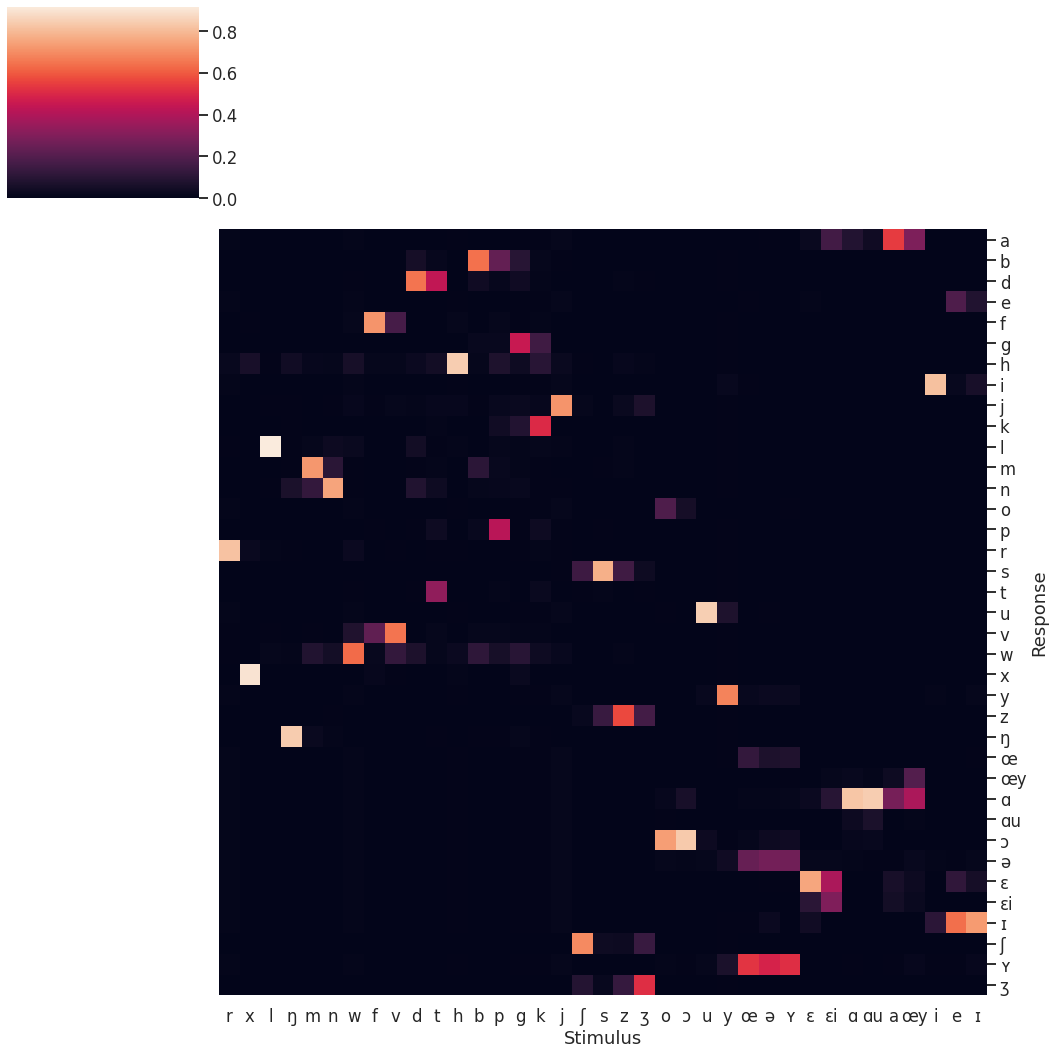

In [52]:
# plt.subplots(figsize=(10, 10))
sns.set("talk")
to_plot = confusion.drop(index=["_"], columns=["_"])
g = sns.clustermap(to_plot / to_plot.sum(axis=0), metric="cosine", row_cluster=False,
                   figsize=(15, 15), xticklabels=True, yticklabels=True)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=0)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.fig.tight_layout()

In [76]:
phons_ipa = pd.read_csv("../../data/gillis2021/confusion/smits_2003_consonants.csv").columns[1:-1].tolist() + \
    pd.read_csv("../../data/gillis2021/confusion/smits_2003_vowels.csv").columns[1:-1].tolist()
phons_ipa

['p',
 't',
 'k',
 'b',
 'd',
 'g',
 'dʒ',
 'f',
 's',
 'ʃ',
 'x',
 'v',
 'z',
 'ʒ',
 'h',
 'r',
 'l',
 'w',
 'j',
 'm',
 'n',
 'ŋ',
 'ɑ',
 'ɛ',
 'ɪ',
 'ɔ',
 'ʏ',
 'ə',
 'i',
 'u',
 'y',
 'e',
 'o',
 'œ',
 'a',
 'ɛi',
 'œy',
 'ɑu']

In [78]:
conf5_theirs = pd.read_csv("../../data/gillis2021/confusion/phon2_conf_matrix_gate5.dat", sep="\s+")
conf5_theirs.index = phons_ipa
conf5_theirs.index.name = "Response"
conf5_theirs.columns = phons_ipa
conf5_theirs.columns.name = "Stimulus"
conf5_theirs

Stimulus,p,t,k,b,d,g,dʒ,f,s,ʃ,...,i,u,y,e,o,œ,a,ɛi,œy,ɑu
Response,,,,,,,,,,,,,,,,,,,,,
p,426,8,25,157,10,8,0,6,0,0,...,2,1,0,0,1,0,1,0,0,1
t,24,333,13,8,298,3,5,3,1,1,...,0,0,0,0,0,1,0,1,0,0
k,22,13,468,10,7,133,1,1,1,0,...,1,0,0,1,1,0,1,2,1,1
b,4,0,3,643,32,32,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
d,2,1,2,47,662,14,0,2,0,0,...,3,2,0,0,0,0,0,0,0,0
g,2,2,75,51,29,538,0,5,0,0,...,0,16,4,0,0,0,0,1,1,0
dʒ,7,12,5,14,475,17,181,1,0,1,...,2,1,1,0,0,0,1,0,0,0
f,0,1,0,0,0,0,0,675,1,0,...,0,0,0,0,0,0,1,0,0,0
s,0,1,0,1,0,0,0,0,715,21,...,0,0,1,0,0,0,0,0,0,0


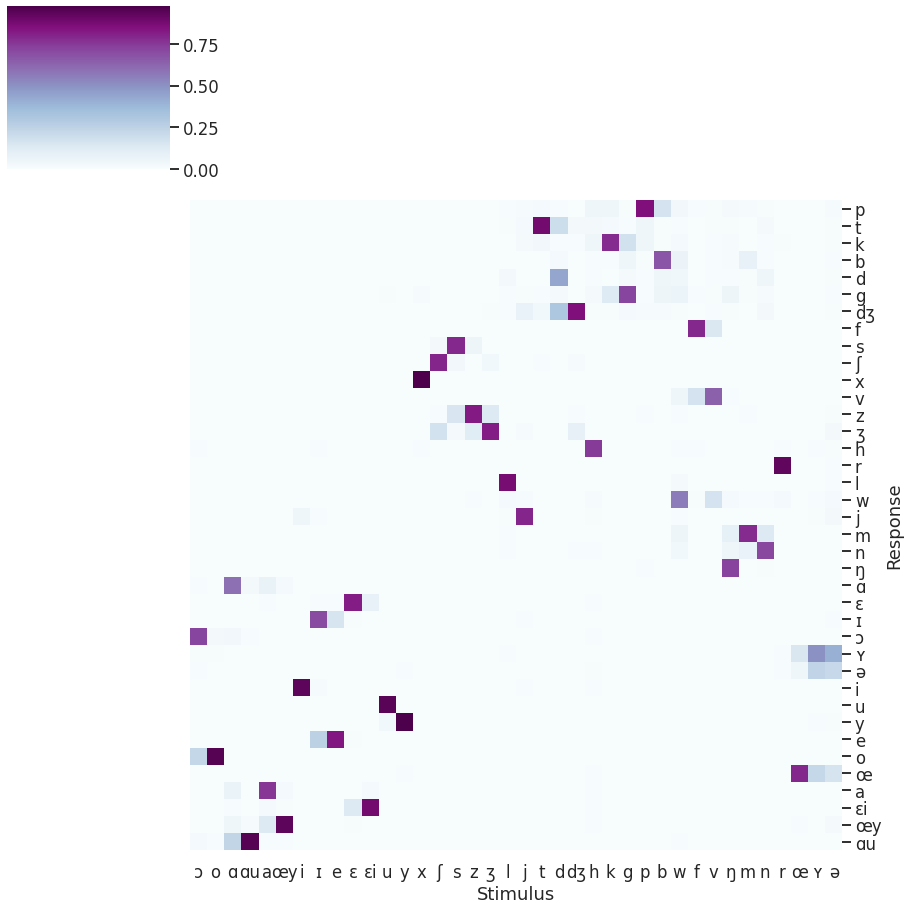

In [90]:
sns.set("talk")
to_plot = conf5_theirs
g = sns.clustermap(to_plot / to_plot.sum(axis=0), metric="cosine", row_cluster=False,
                   figsize=(13, 13), xticklabels=True, yticklabels=True, cmap="BuPu")

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=0)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.fig.tight_layout()